<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/08_pytorch_paper_replicating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (WIP) 08. PyTorch Paper Replicating

TK intro

Want to recreate ViT paper: "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" - https://arxiv.org/abs/2010.11929 - TK will refer to this as "ViT paper" throughout.

* TK what is ViT?

TK - The name Transformer comes from the architecture name in the paper where it was originally introduced, [*Attention is all you need*](https://arxiv.org/abs/1706.03762). An architecture is usually considered a Transformer variant if it uses attention layers in a specific pattern. Since the Transformer architecture originally focused on text data, the goal of the ViT paper was to bring it to the vision.

TK - The original transformer was made to work on sequences of text (1D), Vision Transformer turns images into sequences of "patches".

## TK - What is paper replicating?

It's no secret machine learning is advancing fast.

Many of these advances get published in machine learning research papers.

And the goal of **paper replicating** is to take replicate these advances with code so you can use the techniques for your own problem.

For example, let's say a new model architecture gets released that performs better than any other architecture before on various benchmarks, wouldn't it be nice to try that architecture on your own problems?

* TK image: paper replicating = research paper -> code (translate a research paper into usable code)

## TK - What is a machine learning research paper?

A machine learning research paper is a scientific paper that details findings of a research group on a specific area.

The contents of a machine learning research paper can vary from paper to paper but they generally follow the structure:

| **Section** | **Contents** |
| ----- | ----- | 
| **Abstract** | An overview/summary of the paper's main findings/contributions. |
| **Introduction** | What's the paper's main problem and what are previous methods used to try and solve it? |
| **Method** | How did the researchers go about conducting their research? For example, what model(s) were used, data sources, training setups, etc. |
| **Results** | What are the outcomes of the paper? If a new type of model or training setup was used, how did the results of findings compare to previous works (this is where **experiment tracking** comes in handy)? |
| **Conclusion** | What are the limitations of the suggested methods? What are some next steps for the research community? |
| **References** | What resources/other papers did the researchers look at to build their own body of work? |
| **Appendix** | Are there any extra resources/findings to look at that weren't included in any of the above sections? |

## TK - Why replicate a machine learning research paper?

A machine learning research paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed into a few pages of text.

And if these experiments lead to better results in an area related to the problem you're working on, it'd be nice to them out.

Also, replicating the work of others is a fantastic way to practice your skills.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-george-hotz-quote.png" width=600 alt="george hotz quote saying to get better at being a machine learning engineer, download a paper, implement it and keep going until you have skills"/>

*George Hotz is founder of [comma.ai](https://comma.ai/), a self-driving car company and livestreams machine learning coding on [Twitch](https://www.twitch.tv/georgehotz) and those videos get posted in full to [YouTube](https://www.youtube.com/c/georgehotzarchive). I pulled this quote from one of his livestreams. The "٭" is to note that machine learning engineering often involves the extra step(s) of preprocessing data and making your models available for others to use (deployment).*
    
When you first start trying to replicate research papers, you'll likely be overwhelmed.

That's normal.

Research teams spend weeks, months and sometimes years creating these works so it makes sense if it takes you sometime to even read let alone reproduce the works.

Replicating research is such a tough problem, phenomenal machine learning libraries and tools such as, [HuggingFace](https://huggingface.co/), [PyTorch Image Models](https://github.com/rwightman/pytorch-image-models) (`timm` library) and [fast.ai](https://www.fast.ai/) have been born out of making machine learning research more accessible. 

## TK - Where can you find code examples for machine learning research papers?

One of the first things you'll notice when it comes to machine learning research is: there's a lot of it.

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

In saying this, there are several places to find and read machine learning research papers:
* [arXiv](https://arxiv.org/) - Pronounced "archive", arXiv is a free and open resource for reading technical articles on everything from physics to computer science (inlcuding machine learning).
* [Papers with Code](https://paperswithcode.com/) - A curated collection of trending, active and greatest machine learning papers, many of which include code resources attached. Also includes a collection of common machine learning datasets, benchmarks and current state-of-the-art models.
* [AK Twitter](https://twitter.com/ak92501) - The AK Twitter account publishes machine learning research highlights, often with live demos almost every day. I don't understand 9/10 posts but I find it fun to explore every so often.
* [lucidrains' `vit-pytorch` GitHub repository](https://github.com/lucidrains/vit-pytorch) - Less of a place to find research papers and more of an example of what paper replicating with code on a larger-scale looks like. The `vit-pytorch` repository is a collection of Vision Transformer model architectures from various research papers replicated with PyTorch code (much of the inspiration for this notebook was gathered from this repository). 

TK image: showcase the above

## TK - What we're going to cover

TODO

* ViT -> FoodVision Mini
* Layers = collections of functions to manipulate data -> Architectures = collections of layers (blocks) -> All layers (and blocks) have inputs and outputs
    * Replicating research papers starts by figuring out the inputs and outputs of your layers -> blocks -> model 

## TK - Where can you get help?

All of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 

## TK 0. Getting setup 

As we've done previously, let's make sure we've got all of the modules we'll need for this section.

We'll import the Python scripts (such as `data_setup.py` and `engine.py`) we created in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).

To do so, we'll download [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) directory from the `pytorch-deep-learning` repository (if we don't already have it).

We'll also get the [`torchinfo`](https://github.com/TylerYep/torchinfo) package if it's not available. 

`torchinfo` will help later on to give us a visual representation of our model.

And since later on we'll be using a newer version of the `torchvision` package (as of June 2022), we'll make sure we've got the latest versions.

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.12.0+cu102
torchvision version: 0.13.0+cu102


> **Note:** If you're using Google Colab, you may have to restart your runtime after running the above cell. After restarting, you can run the cell again and verify you've got the right versions of `torch` and `torchvision`.

Now we'll continue with the regular imports, setting up device agnostic code and this time we'll also get the [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) script from GitHub.

The `helper_functions.py` script contains several functions we created in previous sections:
* `set_seeds()` to set the random seeds (created in [07. PyTorch Experiment Tracking section 0](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#create-a-helper-function-to-set-seeds)).
* `download_data()` to download a data source given a link (created in [07. PyTorch Experiment Tracking section 1](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data)).
* `plot_loss_curves()` to inspect our model's training results (created in [04. PyTorch Custom Datasets section 7.8](https://www.learnpytorch.io/04_pytorch_custom_datasets/#78-plot-the-loss-curves-of-model-0))

> **Note:** It may be a better idea for many of the functions in the `helper_functions.py` script to be merged into `going_modular/going_modular/utils.py`, perhaps that's an extension you'd like to try.


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

> **Note:** If you're using Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`.

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## TK 1. Get Data

Since we're continuing on with FoodVision Mini, let's download the pizza, steak and sushi image dataset we've been using.

To do so we can use the `download_data()` function from `helper_functions.py` that we created in [07. PyTorch Experiment Tracking section 1](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data).

We'll `source` to the raw GitHub link of the [`pizza_steak_sushi.zip` data](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip) and the `destination` to `pizza_steak_sushi`.

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

Beautiful! Data downloaded, let's setup the training and test directories.

In [5]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

## TK 2. Create Datasets and DataLoaders

Since we've got some data, let's now turn it into `DataLoader`'s.

To do so we can use the `create_dataloaders()` function in [`data_setup.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py).

First, we'll create a transform to prepare our images.

This where one of the first references to the ViT paper will come in.

In Table 3, the training resolution is mentioned as being 224 (height=224, width=224). 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-image-size-and-batch-size.png" width=900 alt="Table 3 from the Vision Transformer paper showing the image size and batch size"/>

*You can often find various hyperparameter settings listed in a table. In this case we're still preparing our data, so we're mainly concerned with things like image size and batch size. Source: Table 3 in [ViT paper](https://arxiv.org/abs/2010.11929).*

So we'll make sure our transform resizes our images appropriately.

And since we'll be training our model from scratch (no transfer learning to begin with), we won't provide a `normalize` transform like we did in [06. PyTorch Transfer Learning section 2.1](https://www.learnpytorch.io/06_pytorch_transfer_learning/#21-creating-a-transform-for-torchvisionmodels-manual-creation).

### 2.1 Prepare transforms for images

In [6]:
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


### 2.2 Turn images into `DataLoader`'s
Transforms created!

Let's now create our `DataLoader`'s.

The ViT paper states the use of a batch size of 4096 which is 128x the size of the batch size we've been using (32).

We're going to stick with a batch size of 32.

Why?

Because some hardware (including the free tier of Google Colab) may not be able to handle a batch size of 4096.

Having a batch size of 4096 means that 4096 images need to fit into the GPU memory at a time.

This works when you've got the hardware to handle it like a research team from Google often does but when you're running on a single GPU (such as using Google Colab), making sure things work with smaller batch size first is a good idea.

An extension of this project could be to try a higher batch size value and see what happens.

> **Note:** We're using the `pin_memory=True` parameter in the `create_dataloaders()` function to speed up computation. `pin_memory=True` avoids unnecessary copying of memory between the CPU and GPU memory by "pinning" examples that have been seen before. For more on this concept. Though the benefits of this will likely be seen with larger dataset sizes (our FoodVision Mini dataset is quite small). See the PyTorch [`torch.utils.data.DataLoader` documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) or [Making Deep Learning Go Brrrr from First Principles](https://horace.io/brrr_intro.html) by Horace He for more.

In [7]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7fafe426c460>,
 ['pizza', 'steak', 'sushi'])

### TK 2.3 Visualize a single image

Now we've loaded our data, let's *visualize, visualize, visualize!*

An important step in the ViT paper is preparing the images into patches.

We'll get to what this means in a second but for now, let's view a single image and its label.

To do so, let's get a single image and label from a batch of data and inspect their shapes.

In [8]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

Wonderful!

Now let's plot the image and its label with `matplotlib`. 

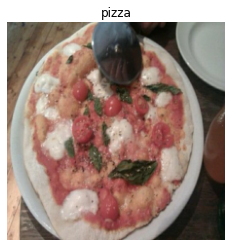

In [9]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

Nice!

Looks like our images are importing correctly, let's continue with the paper replication.

## TK 3. Replicating the ViT paper: an overview

Before we write anymore code, let's discuss what we're doing.

We'd like to replicate the ViT paper for our own problem, FoodVision Mini.

So our inputs are: images of pizza, steak and sushi.

And our ideal model outputs are: predicted labels of pizza, steak or sushi.

No different to what we've been doing throughout the previous sections.

The question is: how do we go from our inputs to the desired outputs?

### 3.1 Inputs and outputs, layers and blocks

ViT is a deep learning neural network architecture.

And any neural network architecture is generally comprised of **layers**.

And a collection of layers is often referred to as a **block**.

And stacking many blocks together is what gives us the whole architecture.

A **layer** takes an input (say an image tensor), performs some kind of function on it (for example what's in the layer's `forward()` method) and then returns an output.

So if a **single layer** takes an input and gives an output, then a collection of layers or a **block** also takes an input and gives an output.

Let's make this concrete:
* **Layer** - takes an input, performs a function on it, returns an output.
* **Block** - a collection of layers, takes an input, performs a series of functions on it, returns an output.
* **Architecture (or model)** - a collection of blocks, takes an input, performs a series of functions on it, returns an output.

This ideology is what we're going to be using to replicate the ViT paper.

We're going to take it layer by layer, block by block, function by function putting the pieces of the puzzle together like Lego to get our desired overall architecture.

The reason we do this is because looking at a whole research paper can be intimidating.

So for a better understanding, we'll break it down, starting with the inputs and outputs of single layer and working up to the inputs and outputs of the whole model.

TK image: stacking the network together like lego (functions + layers + blocks = model).

### 3.2 Getting specific: What's ViT made of?

There are many little details about the ViT model sprinkled throughout the paper.

Finding them all is like one big treasure hunt!

Remember, a research paper is often months of work compressed into a few pages so it's understandable for it to take of practice to replicate.

However, the main three resources we'll be looking at for the architecture design are:
1. **Figure 1** - This gives an overview of the model in a graphical sense, you could *almost* recreate the architecture with this figure alone.
2. **Four equations in section 3.1** - These equations give a little bit more of a mathematical grounding to the coloured blocks in Figure 1.
3. **Table 1** - This table shows the various hyperparameter settings (such as number of layers and number of hidden units) for different ViT model variants. We'll be focused on the smallest version, ViT-Base.

#### TK 3.2.1 Exploring Figure 1

Let's start by going through Figure 1 of the ViT Paper.

The main things we'll be paying attention to are:
1. **Layers** - takes an **input**, performs an operation or function, produces an **output**.
2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs.png" width=900 alt="figure 1 from the original vision transformer paper"/>

*Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers and blocks that create the architecture. Our goal will be to replicate each of these using PyTorch code.* 

The ViT architecture is comprised of several stages:
* **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and add a position number what order the patch comes in.
* **Linear projection of flattened patches (Embedded Patches)** - The image patches get turned into an **embedding**, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable* representation (typically in the form of a vector) of the image that can improve with training.
* **Norm** - This is short for "[Layer Normalization](https://paperswithcode.com/method/layer-normalization)" or "LayerNorm", a technique for regularizing (reducing overfitting) a neural network, you can use LayerNorm via the PyTorch layer [`torch.nn.LayerNorm()`](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html).
* **Multi-Head Attention** - This is a [Multi-Headed Self-Attention layer](https://paperswithcode.com/method/multi-head-attention) or "MSA" for short. You can create an MSA layer via the PyTorch layer [`torch.nn.MultiheadAttention()`](https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html).
* **MLP (or [Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron))** - A MLP can often refer to any collection of feedforward layers (or in PyTorch's case, a collection of layers with a `forward()` method). In the ViT Paper, the authors refer to the MLP as "MLP block" and it contains two [`torch.nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers with a [`torch.nn.GELU()`](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html) non-linearity activation in between them (section 3.1) and a [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) layer after each (Appendex B.1). 
* **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above. There are two skip connections inside the Transformer encoder (the "+" symbols) meaning the layer's inputs are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transformer encoders stacked on top of eachother.
* **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class output. Since we're working on image classification, you could also call this the "classifier head". The structure of the MLP Head is similar to the MLP block.

You might notice that many of the pieces of the ViT architecture can be created with existing PyTorch layers.

This is because of how PyTorch is designed, it's one of the main purposes of PyTorch to create reusable neural network layers for both researchers and machine learning practitioners.

> **Question:** Why not code everything from scratch?
>
> You could definitely do that by reproducing all of the math equations from the paper with custom PyTorch layers and that would certainly be an educative exercise, however, using pre-existing PyTorch layers is usually favoured as pre-existing layers have often been extensively tested and performance checked to make sure they run correctly and fast. 

> **Note:** We're going to focused on write PyTorch code to create these layers, for the background on what each of these layers does, I'd suggest reading the ViT Paper in full or reading the linked resources for each layer.

Let's take Figure 1 and adapt it to our FoodVision Mini problem of classifying images of food into pizza, steak or sushi.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs-food-mini.png" width=900 alt="figure 1 from the original vision transformer paper adapted to work with food images, an image of pizza goes in and gets classified as 'pizza'"/>

*Figure 1 from the ViT Paper adapted for use with FoodVision Mini. An image of food goes in (pizza), the image gets turned into patches and then projected to an embedding. The embedding then travels through the various layers and blocks and (hopefully) the class "pizza" is returned.*

#### TK - 3.2.2 Exploring the Four Equations

The next main part(s) of the ViT paper we're going to look at are the four equations in section 3.1.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png" width=650 alt="four mathematical equations from the vision transformer machine learning paper"/>

*These four equations represent the math behind the four major parts of the ViT architecture.*

Section 3.1 describes each of these (some of the text has been omitted for brevity, bolded text is mine):

1. ...The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a **trainable linear projection** (Eq. 1). We refer to the output of this projection as the **patch embeddings**.
2. The Transformer encoder (Vaswani et al., 2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). **Layernorm (LN) is applied before every block**, and **residual connections after every block** (Wang et al., 2019; Baevski \& Auli, 2019).
3. See above.
4. Similar to BERT's [ class ] token, we **prepend a learnable embedding to the sequence of embedded patches** $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4)...

Let's map these descriptions to the ViT architecture in Figure 1.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-mapping-the-four-equations-to-figure-1.png" width=1000 alt="mapping the vision transformer paper figure 1 to the four equations listed in the paper"/>

*Connecting Figure 1 from the ViT paper to the four equations from section 3.1 describing the math behind each of the layers/blocks. Some details such as "residual connections after every block" are referred to in Figure 1 and in the text but not in the equations.*

There's a lot happening in the image above but following the coloured lines and arrows reveals the main concepts of the ViT architecture.

**Equation 1**

$$
\begin{aligned}
\mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D}
\end{aligned}
$$

This equation deals with the patch embedding and position embedding of the input image.

In vector form, the embedding might look something like:

TK - update the vector form to reflect a real exmaple

```
[class_token, image_patch_1, image_patch_2, image_patch_3...] + [0, image_patch_1_position, image_patch_2_position, image_patch_3_position...]
```

Where each of the elements in the vector is learnable (their `requires_grad=True`).

**Equation 2**

$$
\begin{aligned}
\mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L
\end{aligned}
$$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's a Multi-Head Attention layer (MSA) wrapping a LayerNorm layer (LN).

The addition on the end is the equivalent of adding the input to the output and forming a [skip/residual connection](https://paperswithcode.com/method/residual-connection).

We'll call this layer the "MSA block".

In pseudocode, this might look like: 

```python
# MSA block
x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input
```

**Equation 3**

$$
\begin{aligned}
\mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\
\end{aligned}
$$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's also a Multilayer Perceptron layer (MLP) wrapping a LayerNorm layer (LN).

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer the "MLP block".

In pseudocode, this might look like: 

```python
# MLP block
# Notice how the layer(s) take the output of the MSA block (above) as input and use it as the skip connection on the end 
x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block
```

**Equation 4**

$$
\begin{aligned}
\mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & &
\end{aligned}
$$

This says for the last layer $L$, the output $y$ is the 0 index token of $z$ wrapped in a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block`:

```python
# MLP Head
y = LN_layer(Linear_layer(x_output_MLP_block[0]))
```

Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

> **Note:** The above section covers alot of information. But don't forget if something doesn't make sense, you can always research it further. By asking questions like "what is a residual connection?".

#### TK - 3.2.3 Exploring Table 1

The final piece of the ViT architecture puzzle we'll focus on (for now) is Table 1.

| Model | Layers | Hidden size $D$ | MLP size | Heads | Params |
| :--- | :---: | :---: | :---: | :---: | :---: |
| ViT-Base | 12 | 768 | 3072 | 12 | $86M$ |
| ViT-Large | 24 | 1024 | 4096 | 16 | $307M$ |
| ViT-Huge | 32 | 1280 | 5120 | 16 | $632M$ |

<div align=center>
    <i>Table 1: Details of Vision Transformer model variants. Source: <a href="https://arxiv.org/abs/2010.11929"/>ViT paper.</i>
</div>
<br>

This table showcasing the various hyperparameters of each of the ViT architectures.

You can see the numbers gradually increase from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base (start small and scale up when necessary) but we'll be writing code that could easily scale up to the larger variants.

Breaking the hyperparameters down:
* **Layers** - How many Transformer encoder blocks are there? (each of these will contain a MSA block and MLP block)
* **Hidden size $D$** - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better results. However, a larger embedding comes at the cost of more compute.
* **MLP size** - What are the number of hidden units in the MLP layers?
* **Heads** - How many heads are there in the Multi-Head Attention layers?
* **Params** - What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more compute. You'll notice even ViT-Base has far more parameters than any other model we've used so far.

We'll use these values as the hyperparameter settings for our ViT architecture. 

### TK - 3.3 My workflow for replicating papers

When I start working on replicating a paper, I go through the following steps:

1. Read the whole paper end-to-end once (to get an idea of the main concepts).
2. Go back through each section and see how they line up with each other and start thinking about how they might be turned into code (just like above).
3. Repeat step 2 until I've got a fairly good outline.
4. Use [mathpix.com](https://mathpix.com/) (a very handy tool) to turn any sections of the paper into markdown/LaTeX to put into notebooks.
5. Replicate the simplest version of the model possible.
6. If I get stuck, look up other examples.

TK - gif of mathpix

We've already gone through the first few steps above (and if you haven't read the full paper yet, I'd encourage you to give it a go) but what we'll be focusing on next is step 5: replicating the simplest version fo the model possible.

This is why we're starting with ViT-Base.

Replicating the smallest version of the architecture possible, get it working and then we can scale up if we wanted to.

> **Note:** If you've never read a research paper before, many of the above steps can be intimidating. But don't worry, like anything, your skills at reading *and* replicating papers will improve with practice. Don't forget, a research paper is often *months* of work by many people compressed into a few pages. So trying to replicate it on your own is no small feat. 

## TK 4. Equation 1: Split data into patches and creating the patch embedding 

Let's start by creating the patch embedding.

This means we'll be turning our input images in a sequence of patches and then embedding those patches.

Recall that an **embedding** is a learnable representation of some form and is often a vector. The term learnable is important because this means the representation of an input image can be improved and learned over time.

We'll begin by following the opening paragraph of section 3.1 of the ViT paper (bold mine):

> The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the **patch embeddings**.

And size we're dealing with image shapes, let's keep in mind the line from Table 3 of the ViT paper: 

> Training resolution is **224**.

Let's break down the text above.

* $D$ is the size of the **patch embeddings**, different values for $D$ can be found in Table 1.
* The image starts as 2D with size ${H \times W \times C}$.
* The image gets converted to a sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.
    * $(H, W)$ is the resolution of the original image.
    * $C$ is the number of channels.
    * $(P, P)$ is the resolution of each image patch (**patch size**).
    * $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-equation-1-annotated.png" width=900 alt="mapping the vit architecture diagram positional and patch embeddings portion to the relative mathematical equation describing what's going on"/>

*Mapping the patch and position embedding portion of the ViT architecture from Figure 1 to Equation 1. The opening paragraph of section 3.1 describes the different input and output shapes of the patch embedding layer.*

### TK - 4.1 Calculating patch embedding input and output shapes by hand

How about we start by calculating these input and output shape values by hand?

To do so, let's create some variables to mimic each of the terms (such as $H$, $W$ etc) above.

We'll use a patch size ($P$) of 16 since it's the best performing version of ViT-Base uses (see column "ViT-B/16" of Table 5 in the ViT paper for more).

In [14]:
# Create example values
height = 224 # H ("The training resolution is 224.")
width = 224 # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196


We've got the number of patches, how about we create the image output size as well?

Better yet, let's replicate the input and output shapes of the patch embedding layer.

Recall:

* **Input:** The image starts as 2D with size ${H \times W \times C}$.
* **Output:** The image gets converted to a sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

In [15]:
# Input shape
input_shape = (height, width, color_channels)

# Output shape
output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (2D image): {input_shape}")
print(f"Output shape (flattened 2D patches): {output_shape}")

Input shape (2D image): (224, 224, 3)
Output shape (flattened 2D patches): (196, 768)


Input and output shapes acquired!

### TK - 4.2 Turning a single image into patches

Now we know the ideal input and output shapes for our **patch embedding** layer.

What we're doing here is breaking the overall architecture down into smaller pieces, focusing on the inputs and outputs of individual layers.

So how do we create the patch embedding layer?

We'll get to that shortly, first, let's *visualize, visualize, visualize!* what it looks like to turn an image into patches.

Let's start with our single image.

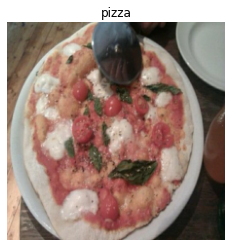

In [34]:
# View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);

We want to turn this image into patches of itself inline with Figure 1 of the ViT paper.

How about we start by just visualizing the top row of patched pixels?

We can do this by indexing on the different image dimensions.

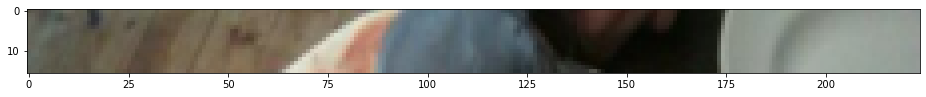

In [60]:
# Change image shape to be compatible with matplotlib (color_channels, height, width) -> (height, width, color_channels) 
image_permuted = image.permute(1, 2, 0)

# Index to plot the top row of patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

Now we've got the top row, let's turn it into patches.

We can do this by iterating through the number of patches there'd be in the top row. 

Number of patches per row: 14.0


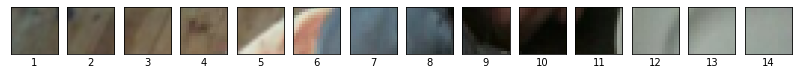

In [70]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size 
assert img_size % patch_size == 0, "Image size must be divisible by patch size" 
print(f"Number of patches per row: {num_patches}")

# Create a series of subplots
fig, axs = plt.subplots(nrows=1, 
                        ncols=img_size // patch_size, # one column for each patch
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]); # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Those are some nice looking patches!

How about we do it for the whole image?

This time we'll iterate through the indexs for height and width and plot each patch as it's own subplot.

Number of patches per row: 14.0
Number of patches per column: 14.0
Total patches: 196.0


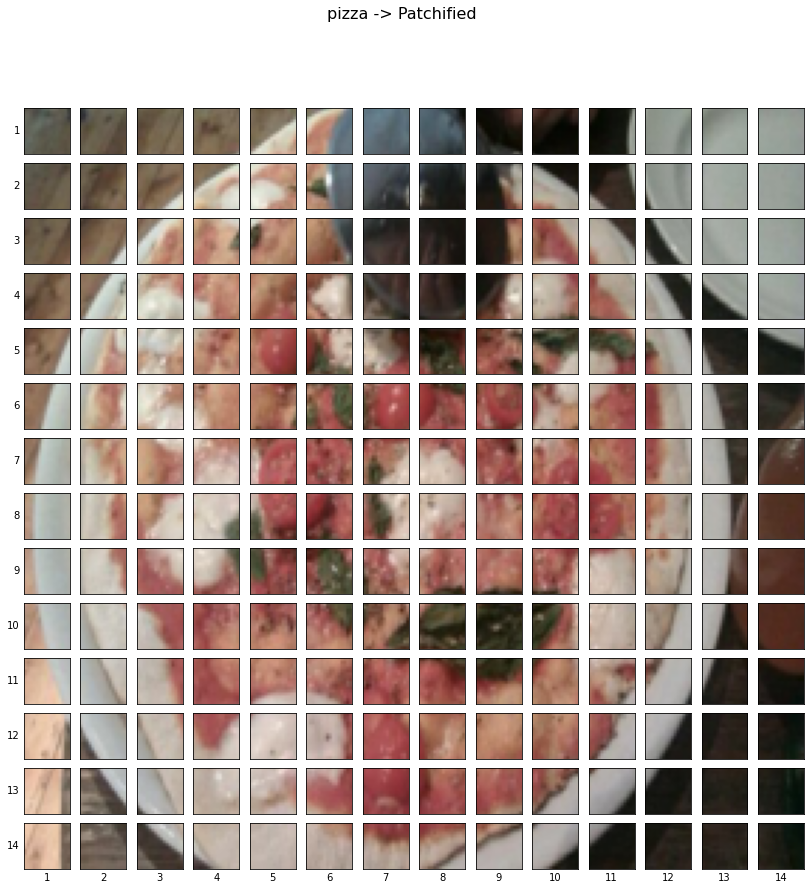

In [73]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size 
assert img_size % patch_size == 0, "Image size must be divisible by patch size" 
print(f"Number of patches per row: {num_patches}\nNumber of patches per column: {num_patches}\nTotal patches: {num_patches*num_patches}")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size, 
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width
        
        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_h+patch_size, # iterate through height 
                                        patch_width:patch_w+patch_size, # iterate through width
                                        :]) # get all color channels
        
        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1, 
                             rotation="horizontal", 
                             horizontalalignment="right", 
                             verticalalignment="center") 
        axs[i, j].set_xlabel(j+1) 
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

Image patchified!

Woah, that looks cool.

Now how do we turn each of these patches into an embedding and convert them into a sequence?

Hint: we can use PyTorch layers. Can you guess which?

### TK - 4.3 Creating image patches with PyTorch layers

UPTOHERE: creating an animation in keynote to show the conversion of images to patches of embeddings

TK - see "Hybrid Architecture" in section 3.1 in the ViT paper 

> **Hybrid Architecture.** As an alternative to raw image patches, the input sequence can be formed from feature maps of a CNN (LeCun et al., 1989). In this hybrid model, the patch embedding projection $\mathbf{E}$ (Eq. 1) is applied to patches extracted from a **CNN feature map**. As a special case, the patches can have spatial size $1 \times 1$, which means that the **input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension**. The classification input embedding and position embeddings are added as described above.

Let's say I want patches of 16x16, I want a Conv2d with:
* in_channels=3 (number of channels)
* out_channels=D (number of hidden units)
* kernel=patch_size (make the kernel the patch)
* padding="same" (want to keep the same dimensions of the input as the output)
* stride=patch_size (stride the size of the patch)

In [13]:
from torch import nn
patch_size=16

# Create the embedding and the patch in one hit 
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=768, # from Table 1: Hidden size D
                   kernel_size=patch_size,
                   stride=patch_size,
                   padding=0)

flatten = nn.Flatten(start_dim=2, 
                     end_dim=3) # https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html 

In [14]:
# Now we have a patchified image of 256 tokens + an embedding for each patch
patch_image_out_of_conv = conv2d(image.unsqueeze(0))
print(patch_image_out_of_conv.shape)
patch_image = flatten(conv2d(image.unsqueeze(0)))
patch_image.shape

torch.Size([1, 768, 14, 14])


torch.Size([1, 768, 196])

Showing 10 random Conv2d patches from index 89 to 99


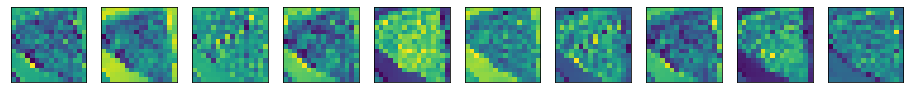

In [39]:
# Plot random 10 conv patches
import random
random_start = random.randint(0, 758)
random_end = random_start + 10
print(f"Showing 10 random Conv2d patches from index {random_start} to {random_end}")
patches = patch_image_out_of_conv[:, random_start:random_start+10, :, :]

fig, axs = plt.subplots(ncols=10, squeeze=False, figsize=(16, 16))
for i in range(10):
    axs[0, i].imshow(patches[:, i, :, :].squeeze().detach().numpy())
    axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [40]:
# Get image in shape [batch_size, N, P^2*C]
patch_image.transpose(-2, -1).shape

torch.Size([1, 256, 768])

In [41]:
# Get image in shape [batch_size, N, P^2*C]
reshaped_patch_image = patch_image.permute(0, 2, 1)
reshaped_patch_image.shape

torch.Size([1, 256, 768])

### TK - 4.4 Replicating the ViT patch embedding layer with PyTorch



In [28]:
class PatchEmbedding(nn.Module):
    def __init__(self, 
                 in_channels=3,
                 patch_size=16,
                 embedding_dim=768):
        super().__init__()
        
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        self.flatten = nn.Flatten(start_dim=2, # only flatten the 2nd last and last dim
                                  end_dim=3)

    def forward(self, x):
        # print(x.shape)
        x_patched = self.patcher(x)
        # print(x_patched.shape)
        x_flattened = self.flatten(x_patched) 
        # print(x_flattened.shape)
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2*C, N] -> [batch_size, N, P^2*C]

In [29]:
patchify = PatchEmbedding()
patched_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
patched_image.shape

torch.Size([1, 196, 768])

In [31]:
summary(patchify, input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

## TK. 5. Create MSA (Multihead Self-Attention)

See docs - https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html

Heads = 12 

In [21]:
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ("MSABlock" for short).
    
    Uses PyTorch's torch.nn.MultiheadAttention: https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html
    Source code for what's happening behind the scenes: https://github.com/pytorch/pytorch/blob/master/torch/nn/functional.py#L4909
    """
    def __init__(self,
                 embedding_dim=768, # From Table 1
                 num_heads=12, # From Table 1
                 attn_dropout=0): # Doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True)

    def forward(self, x):
        attn_output, _ = self.multihead_attn(query=x,
                                             key=x,
                                             value=x,
                                             need_weights=False)
        return attn_output

In [22]:
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, 
                                                             num_heads=12)
patched_image_through_msa_block = multihead_self_attention_block(patched_image)
patched_image_through_msa_block.shape

torch.Size([1, 196, 768])

## TK 6. Create feedforward model (MLP)

> Dropout, when used, is applied **after every dense layer except for the the qkv-projections and directly after adding positional- to patch embeddings.**

> The MLP contains two layers with a GELU non-linearity

$$
\begin{aligned}
\mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L
\end{aligned}
$$ 

In [23]:
# Could also call this "FeedForward"
class MLPBlock(nn.Module):
    """Creates an MLPBlock of the Vision Transformer architecture."""
    def __init__(self,
                 embedding_dim, # embedding dimension (Hidden Size D in Table 1)
                 mlp_size, # MLP size in Table 1
                 dropout=0): # "Dropout... is applied to every dense layer... (Appendix B.1)"
        super().__init__()
        
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # "The MLP contains two layers with a GELU non-linearity (section 3.1)."
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, # needs to take same in_features as out_features of layer above
                      out_features=embedding_dim) # take back to embedding_dim
            nn.Dropout(p=dropout)
        )

    def forward(self, x):
        return self.mlp(x)

In [24]:
mlp_block = MLPBlock(embedding_dim=768, # Table 1 
                     mlp_size=3072) # Table 1
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
patched_image_through_mlp_block.shape

torch.Size([1, 196, 768])

## TK 7. Create transformer block



In [25]:
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    def __init__(self,
                 embedding_dim=768, # From Table 1
                 num_heads=12, # From Table 1
                 mlp_size=3072, # From Table 1
                 mlp_dropout=0.1,
                 attn_dropout=0):
        super().__init__()

        # Create MSA Block (for equation 2)
        self.msa_block = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                      num_heads=num_heads,
                                                      attn_dropout=attn_dropout))
        
        # Create MLP Block (for equation 3)
        self.mlp_block = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            MLPBlock(embedding_dim=embedding_dim,
                     mlp_size=mlp_size,
                     dropout=mlp_dropout))

    def forward(self, x):
        x = self.msa_block(x) + x # Create skip connection
        x = self.mlp_block(x) + x # Create skip connection
        return x

## TK 8. Putting it all together to create ViT

Combine the transformer blocks and patched embedding into a ViT architecture.

In [26]:
class ViT(nn.Module):
    """Creates a Vision Transformer architecture."""
    def __init__(self,
                 img_size=224, # From Table 3 in ViT paper
                 in_channels=3,
                 patch_size=16,
                 num_transformer_layers=12, # From Table 1 in ViT paper
                 embedding_dim=768,
                 mlp_size=3072,
                 num_heads=12,
                 attn_dropout=0,
                 mlp_dropout=0.1,
                 embedding_dropout=0.1,
                 num_classes=1000): # default for ImageNet
        super().__init__() # don't for the super().__init__()!
    
        # Get image size
        self.img_height, self.img_width = img_size, img_size
        
        # Calculate number of patches (height * width/patch^2)
        self.num_patches = (self.img_height * self.img_width) // patch_size**2
        
        # Create position embedding (from index 1 -> last of patch embedding size)
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)
                 
        # Create class embedding (needs to go at front of sequence embedding)
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)
                
        # Create embedding dropout
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
        # Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        
        # Create transformer encoder blocks
        self.transformer_enedoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
       
        # Create classifier head (equation 4)
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim, 
                      out_features=num_classes)
        )
    
    def forward(self, x):
        # Get batch size
        batch_size = x.shape[0]
        # Create class token embedding
        class_token = self.class_embedding.expand(batch_size, -1, -1)

        # Create patch embedding
        x = self.patch_embedding(x)

        # Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # Run embedding dropout
        x = self.embedding_dropout(x)

        # Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_enedoder(x)

        # Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x
        

In [27]:
batch_size = 32
class_tokens = nn.Parameter(data=torch.randn(1, 1, 768))
class_tokens.expand(batch_size, -1, -1).shape

torch.Size([32, 1, 768])

In [28]:
set_seeds()
device = "cuda" if torch.cuda.is_available() else "cpu"
rand_image = torch.randn(1, 3, 224, 224)
# vit = ViT(num_classes=len(class_names)) 
vit = ViT(num_classes=3)
vit(rand_image)

tensor([[0.6055, 1.3140, 0.2506]], grad_fn=<AddmmBackward0>)

## TK 9. Inspect the model

> **Note:** If you go too big, your hardware might not be able to handle it... (e.g. too high of a batch size...)

TK - Number of parameters should be equivalent to: https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16 (`num_params=86,567,656`)

In [29]:
from torchinfo import summary

# TK - clean up the summary so it looks nice when it prints out 
# Print a summary using torchinfo (uncomment for actual output)
summary(model=vit, 
        input_size=(128, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                     Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                                   [128, 3, 224, 224]   [128, 3]             152,064              True
├─Dropout (embedding_dropout)                                               [128, 197, 768]      [128, 197, 768]      --                   --
├─PatchEmbedding (patch_embedding)                                          [128, 3, 224, 224]   [128, 196, 768]      --                   True
│    └─Conv2d (patcher)                                                     [128, 3, 224, 224]   [128, 768, 14, 14]   590,592              True
│    └─Flatten (flatten)                                                    [128, 768, 14, 14]   [128, 768, 196]      --                   --
├─Dropout (embedding_dropout)                                               [128, 197, 768]      [128, 197, 768]      --               

* TK - same number of parameters as: https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16 -> 86567656

In [30]:
batch_size = 32
cls_embedding = nn.Parameter(torch.randn(1, 1, 768))
# See here: https://pytorch.org/docs/stable/generated/torch.Tensor.expand.html
cls_embedding.shape, cls_embedding.expand(batch_size, -1, -1).shape

(torch.Size([1, 1, 768]), torch.Size([32, 1, 768]))

## TK 10. Train model



In [31]:
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=vit.parameters(), 
                             lr=1e-3,
                             betas=(0.9, 0.999), # default
                             weight_decay=0.1) # from the ViT paper section 4.1
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.8765 | train_acc: 0.3516 | test_loss: 1.8075 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.7652 | train_acc: 0.2500 | test_loss: 1.8281 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.7685 | train_acc: 0.2930 | test_loss: 1.0586 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.3442 | train_acc: 0.3906 | test_loss: 1.6053 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.2500 | train_acc: 0.2969 | test_loss: 1.0597 | test_acc: 0.4811
Epoch: 6 | train_loss: 1.1027 | train_acc: 0.4258 | test_loss: 1.2707 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.1864 | train_acc: 0.2578 | test_loss: 1.3656 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1701 | train_acc: 0.3047 | test_loss: 1.2117 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.1279 | train_acc: 0.4219 | test_loss: 1.0078 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.1814 | train_acc: 0.2344 | test_loss: 1.1760 | test_acc: 0.2604


## TK 11. Evaluate model

TK - plot the loss curves

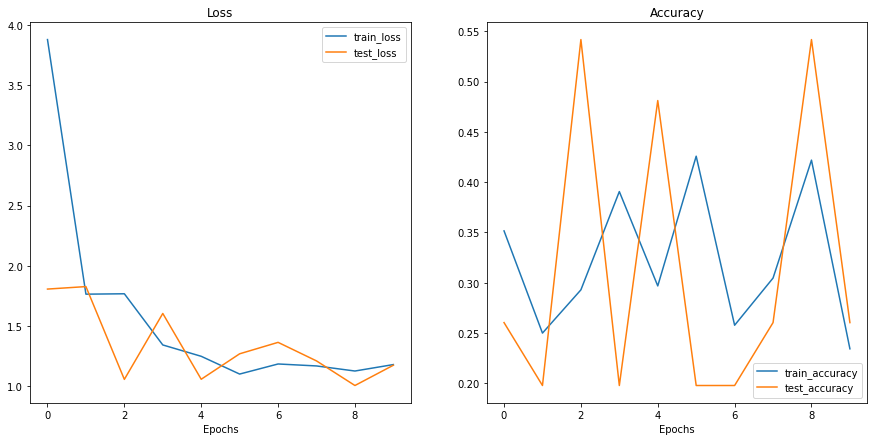

In [32]:
from helper_functions import plot_loss_curves

plot_loss_curves(results)

TK - why do the loss curves look the way they do? (too big of a model, not enough data)

## TK 12. Bring in pretrained ViT from `torchvision.models` on same dataset 

* Get a similar model from here - https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16 

In [33]:
# The following requires torch v0.12+ and torchvision v0.13+
import torch
import torchvision
print(torch.__version__) 
print(torchvision.__version__)

1.13.0.dev20220606
0.14.0.dev20220606


In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
# Set seeds
def set_seeds(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [36]:
# Requires torchvision >= 0.13
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
    
# Change the classifier head
set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [37]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit, 
        input_size=(128, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                                  [128, 3, 224, 224]   [128, 3]             768                  Partial
├─Conv2d (conv_proj)                                                   [128, 3, 224, 224]   [128, 768, 14, 14]   (590,592)            False
├─Encoder (encoder)                                                    [128, 197, 768]      [128, 197, 768]      151,296              False
│    └─Dropout (dropout)                                               [128, 197, 768]      [128, 197, 768]      --                   --
│    └─Sequential (layers)                                             [128, 197, 768]      [128, 197, 768]      --                   False
│    │    └─EncoderBlock (encoder_layer_0)                             [128, 197, 768]      [128, 197, 768]      (7,087,872)          False
│    │    └─Encod

In [38]:
# TK - the above output has the same number of parameters as our own created model

In [39]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [40]:
train_dir = image_path / "train"
test_dir = image_path / "test" 
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [41]:
# Create dataset for pretrained ViT
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=1024) # From here: https://arxiv.org/abs/2205.01580 (there are other improvements there too...)


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [42]:
# Train pretrained feature extractor ViT for 5 epochs on Pizza, Steak, Sushi
# TK - can probably increase the batch_size here because we're using feature extraction and not 
# training the whole model
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), 
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1490 | train_acc: 0.2356 | test_loss: 1.0584 | test_acc: 0.4667
Epoch: 2 | train_loss: 1.0017 | train_acc: 0.5289 | test_loss: 0.9194 | test_acc: 0.6400
Epoch: 3 | train_loss: 0.8716 | train_acc: 0.7244 | test_loss: 0.7983 | test_acc: 0.6667
Epoch: 4 | train_loss: 0.7583 | train_acc: 0.8089 | test_loss: 0.6942 | test_acc: 0.7733
Epoch: 5 | train_loss: 0.6608 | train_acc: 0.8622 | test_loss: 0.6060 | test_acc: 0.8800
Epoch: 6 | train_loss: 0.5777 | train_acc: 0.8889 | test_loss: 0.5318 | test_acc: 0.8933
Epoch: 7 | train_loss: 0.5076 | train_acc: 0.9156 | test_loss: 0.4700 | test_acc: 0.9067
Epoch: 8 | train_loss: 0.4487 | train_acc: 0.9244 | test_loss: 0.4188 | test_acc: 0.9333
Epoch: 9 | train_loss: 0.3993 | train_acc: 0.9378 | test_loss: 0.3765 | test_acc: 0.9333
Epoch: 10 | train_loss: 0.3580 | train_acc: 0.9378 | test_loss: 0.3417 | test_acc: 0.9467


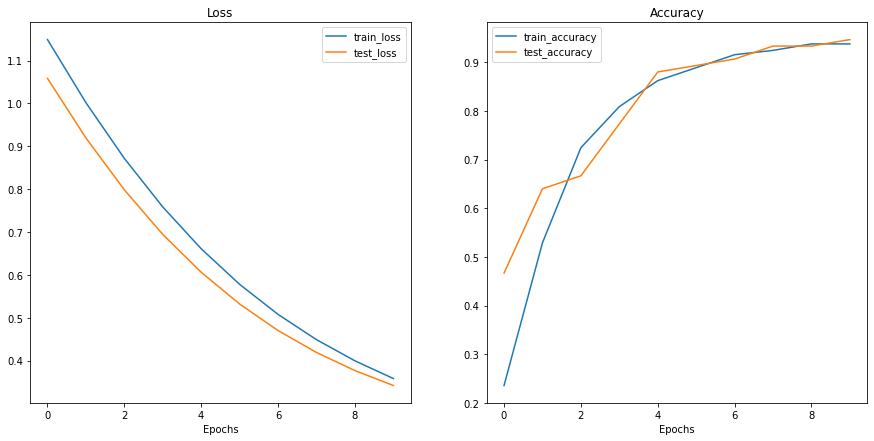

In [43]:
# Plot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results) 

In [44]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=pretrained_vit,
                 target_dir="models",
                 model_name="08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


In [45]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth").stat().st_size // (1024*1024)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


## TK - Things this replication misses out on

TK Put down the difference in the paper vs this replication
* Many of these things are in Table 3:
    * training data (ImageNet from scratch vs FoodVision Mini data) 
    * LR warmup
    * LR decay
    * Weight decay
    * Number of epochs

## TK - Exercises

## TK - Extra-curriculum

* See the illustrated transformer for an overview of the Transformer model:  https://jalammar.github.io/illustrated-transformer/